# Proyecto Final

- Martínez Ostoa Néstor
- Estrategias de Portafolios de Inversión Utilizando Ciencia de Datos
- LCD, IIMAS, UNAM
- Mayo 2022

## Generación de datos

Fecha de inicio: 2000/04/29

Fecha de fin: 2022/04/29

---

Para esta etapa, empleé datos de precios de acciones de las 500 empresas del S&P 500 y recopilé las siguientes 5 métricas: 

1. Moving Average Convergence Divergence (MACD)
2. On Balance Volume
3. Price Rate of Change
4. Relative Strength Index
5. Stochastic Oscillator

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_datareader.data as web
import pandas_ta as ta
import datetime

sns.set_theme(style="dark")

In [3]:
start = datetime.datetime(2000,4,29)
end = datetime.datetime(2022,4,29)

In [4]:
def get_stock_data(ticker, start, end):
    data = web.DataReader(f"{ticker}","yahoo",start,end)
    return data[['High', 'Low', 'Close', 'Volume']]

def add_macd(df):
    """
    Moving Average Convergence Divergence
    """
    df.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
    df.rename(
        columns={'MACD_12_26_9': 'MACD', 'MACDs_12_26_9': 'Signal', 'MACDh_12_26_9':'Histogram'}, 
        inplace=True)
    return df

def add_obv(df):
    """
    On-Balance Volume
    """
    obv = df.ta.obv(close='Close', volume='Volume')
    df['OBV'] = obv
    return df

def add_roc(df):
    """
    Price Rate of Change
    """
    roc = df.ta.roc(close='Close')
    df['ROC'] = roc
    return df

def add_rsi(df):
    """
    Relative Strength Index
    """
    rsi = df.ta.rsi(close='Close')
    df['RSI'] = rsi
    return df

def add_stoch(df):
    """
    Stochastic Oscillator
    """
    df.ta.stoch(high='High', low='Low', close='Close', append=True)
    return df

def add_willr(df):
    """
    William's Percent Range
    """
    willr = df.ta.willr(high='High', low='Low', close='Close')
    df['WILLR'] = willr
    return df

def add_technical_indicators(stock_data, indicators):
    """
    stock_data: Panda's data frame
        - Should contain the following attributes:
            - High
            - Low
            - Close
            - Volume
    indicators: list with technical indicators functions
    """
    for indicator in indicators:
        stock_data = indicator(stock_data)
    stock_data.drop(columns=['High', 'Low'], inplace=True)
    return stock_data
    

Ejemplo de datos recolectados para solo una acción:

In [5]:
data = get_stock_data('AAPL', start, end)
indicators = [add_macd, add_obv, add_roc, add_rsi, add_stoch, add_willr]
data = add_technical_indicators(data, indicators)
data

,Close,Volume,MACD,Histogram,Signal,OBV,ROC,RSI,STOCHk_14_3_3,STOCHd_14_3_3,WILLR
Date,,,,,,,,,,,
2000-05-01,1.109933,226195200.0,NaN,NaN,NaN,2.261952e+08,NaN,NaN,NaN,NaN,NaN
2000-05-02,1.052455,236432000.0,NaN,NaN,NaN,-1.023680e+07,NaN,NaN,NaN,NaN,NaN
2000-05-03,1.027344,489798400.0,NaN,NaN,NaN,-5.000352e+08,NaN,NaN,NaN,NaN,NaN
2000-05-04,0.988281,399515200.0,NaN,NaN,NaN,-8.995504e+08,NaN,NaN,NaN,NaN,NaN
2000-05-05,1.010045,284076800.0,NaN,NaN,NaN,-6.154736e+08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,162.880005,96046400.0,-1.134753,-1.121554,-0.013199,8.706789e+10,-4.238927,41.922638,14.362295,17.326290,-77.721779
2022-04-26,156.800003,95623200.0,-1.834306,-1.456885,-0.377421,8.697227e+10,-5.399696,34.916163,8.152724,12.542720,-99.526896
2022-04-27,156.570007,88063200.0,-2.379831,-1.601929,-0.777903,8.688421e+10,-6.614575,34.680043,9.789935,10.768318,-93.381520


Ahora, haciendo este mismo proceso para todas las empresas del S&P 500

In [6]:
with open('sp_tickers.txt') as f:
    sp_tickers = f.readlines()

In [10]:
indicators = [add_macd, add_obv, add_roc, add_rsi, add_stoch, add_willr]
tickers_data = []

for ticker in sp_tickers:
    ticker = ticker.replace('\n', '')
    ticker = ticker.strip()
    try:
        stock_data = get_stock_data(ticker, start, end)
        stock_data_ti = add_technical_indicators(stock_data, indicators)
        stock_data_ti.to_csv(f'./data/{ticker}.csv')
        tickers_data.append(stock_data_ti)
    except:
        print(f"Could not fetch data for {ticker} ticker")

Could not fetch data for BRK.B ticker
Could not fetch data for LEN ticker
Could not fetch data for BF.B ticker
Could not fetch data for EMBC ticker


## Evaluación con Bosques Aleatorios

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [100]:
def get_X_y_from(df):
    temp = df.copy()
    temp = temp.dropna()
    #mid_date = '2020-04-29'
    #training_data = temp[temp.index <= mid_date]
    #test_data = temp[temp.index > mid_date]
    
    #y_train = training_data['Close']
    #training_data = training_data.drop(columns=['Close'])
    #X_train = training_data
    
    #y_test = test_data['Close']
    #test_data = test_data.drop(columns=['Close'])
    #X_test = test_data
    
    y = temp['Close']
    X = temp.drop(columns=['Close'])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=23)
    
    return X_train, X_test, y_train, y_test

In [122]:
i = 0
scores = []

for df in tickers_data:
    X_train, X_test, y_train, y_test = get_X_y_from(df)
    regr = RandomForestRegressor(
        max_depth=100, random_state=0,
        min_samples_split = 5,
        min_samples_leaf = 4,
        n_estimators=150
    )
    regr.fit(X_train, y_train)
    score = regr.score(X_test, y_test)
    scores.append(score)
    print(f"#{i+1}: {sp_tickers[i]} - {score}")
    i += 1

#1: AAPL
 - 0.9616472412036212
#2: MSFT
 - 0.935013424415222
#3: AMZN
 - 0.999177146270195
#4: GOOGL
 - 0.9764340316405208
#5: GOOG
 - 0.988694315435606
#6: TSLA
 - 0.9976096542079271
#7: BRK.B
 - 0.8973105783993021
#8: JNJ
 - 0.9891750561923436
#9: FB
 - 0.9874405325581159
#10: UNH
 - 0.9951735110156242
#11: NVDA
 - 0.8533507983827744
#12: XOM
 - 0.9711117113692933
#13: PG
 - 0.8684801975285343
#14: JPM
 - 0.9925163411778434
#15: V
 - 0.9577490131884929
#16: CVX
 - 0.9941536214837822
#17: HD
 - 0.9918061900571787
#18: MA
 - 0.8185679323203687
#19: PFE
 - 0.963490015508692
#20: ABBV
 - 0.977300250839238
#21: BAC
 - 0.9879951011193415
#22: KO
 - 0.9962532928857233
#23: AVGO
 - 0.9222327469477298
#24: PEP
 - 0.9707082367775247
#25: LLY
 - 0.8767022445395943
#26: MRK
 - 0.9877199145088705
#27: TMO
 - 0.9792605423671517
#28: COST
 - 0.815304165597777
#29: CSCO
 - 0.7627297434077505
#30: VZ
 - 0.9938267553966809
#31: ABT
 - 0.9808082910000594
#32: DIS
 - 0.9885830492219558
#33: CMCSA
 - 0.9

#261: GLW
 - 0.9867434805273828
#262: TSN
 - 0.9781980592091203
#263: APTV
 - 0.9869915665443901
#264: LUV
 - 0.99319218367926
#265: AWK
 - 0.9878871719336025
#266: SIVB
 - 0.9765743154949836
#267: DAL
 - 0.995740470717999
#268: KEYS
 - 0.965671501834439
#269: EQR
 - 0.9347047698028725
#270: FRC
 - 0.9975430270611787
#271: ODFL
 - 0.7377138413368726
#272: STT
 - 0.9605282544672654
#273: FITB
 - 0.8948476042565112
#274: WTW
 - 0.9741333016006105
#275: EIX
 - 0.8121100442847349
#276: CTRA
 - 0.9943152574147732
#277: MKC
 - 0.9913518331253098
#278: DTE
 - 0.8734490320101791
#279: ZBH
 - 0.7838936266538811
#280: FE
 - 0.841408480737612
#281: MOS
 - 0.9979324337907597
#282: CPRT
 - 0.9609863137342116
#283: ARE
 - 0.9823905700746445
#284: ANET
 - 0.9609375559716022
#285: AEE
 - 0.9890970030861815
#286: EFX
 - 0.9977129627204847
#287: BALL
 - 0.9917126916872905
#288: EXR
 - 0.8860031264737409
#289: HIG
 - 0.9423839367444353
#290: ETR
 - 0.9730705358004954
#291: TSCO
 - 0.9361348745774157
#292

## Elección de los mejores activos

Tomaré portafolios de $n=25,50,75,100,125,150,175,200$ activos

In [278]:
sorted_assets = np.argsort(scores)
n_assets = []
num_assets = [25,50,75,100,125,150,175,200] #[5,10,15,20,30,50,75,100]
for n in num_assets:
    n_assets.append(sorted_assets[:n])

In [279]:
for i in range(len(n_assets)):
    print(f"n={len(n_assets[i])}")

n=25
n=50
n=75
n=100
n=125
n=150
n=175
n=200


In [280]:
url = "https://raw.githubusercontent.com/datasets/s-and-p-500-companies/master/data/constituents.csv"
sectors_df = pd.read_csv(url)
sectors_df.head()

,Symbol,Name,Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ABMD,Abiomed,Health Care


In [293]:
def find_sectors(assets, sp_tickers):
    sectors_found = dict()
    for asset_idx in assets:
        asset = sp_tickers[asset_idx]
        asset = asset.replace('\n', '')
        try:
            sector = sectors_df[sectors_df['Symbol'] == asset]['Sector'].values[0]
        except:
            if asset == 'CPT': sector = 'Real Estate'
            elif asset == 'EPAM' or asset == 'FDS': sector = 'Information Technology'
        if sector not in sectors_found:
            sectors_found[sector] = 0
        sectors_found[sector] += 1
    return sectors_found

def plot_sectors(n_assets, sp_tickers):
    f, axis = plt.subplots(2, 4, figsize=(20, 9))
    row = 0
    col = 0
    for i, assets in enumerate(n_assets):
        sectors_dict = find_sectors(assets, sp_tickers)
        df = pd.DataFrame({'companies':list(sectors_dict.values()), 'sector':list(sectors_dict.keys())})
        df = df.sort_values('companies', ascending=False)
        sns.barplot(x='companies', y='sector',ax=axis[row][col], data=df)
        axis[row][col].set_title(f"N={df['companies'].sum()} assets")
        #axis[row][col].set_xticklabels(df['sector'], rotation=80)
        axis[row][col].set_ylabel(ylabel='')
        col += 1
        if col == 4:
            col = 0
            row += 1
    plt.tight_layout()
    plt.show()

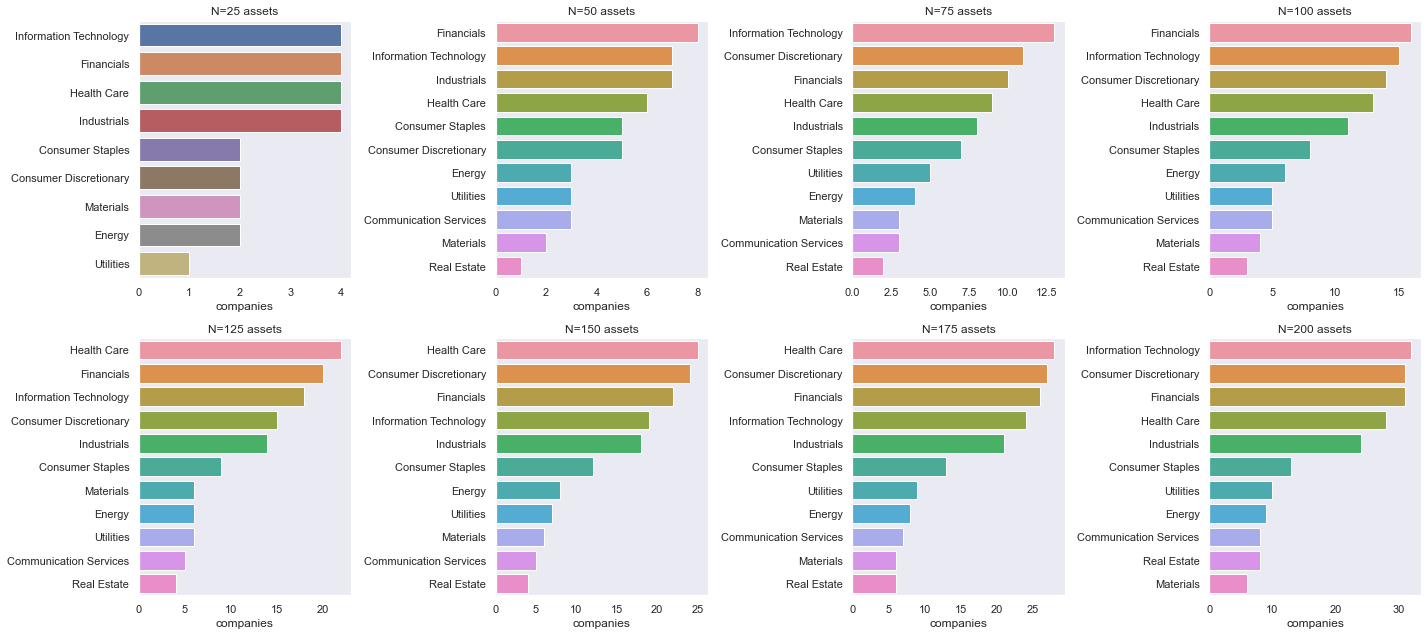

In [294]:
plot_sectors(n_assets, sp_tickers)

## Construcción de los portafolios


In [296]:
from functools import reduce

In [334]:
def get_stock(ticker, start, end):
    data = web.DataReader(f"{ticker}","yahoo",start,end)
    data[f'{ticker}'] = data["Close"]
    data = data[[f'{ticker}']] 
    return data 

def combine_stocks(tickers, start, end):
    data_frames = []
    for idx, ticker in enumerate(tickers):
        print(f"{idx}:{ticker}", end=' ')
        try: 
            data_frames.append(get_stock(ticker, start, end))
        except:
            print("failed", end=' ')
            continue
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='outer'), data_frames)
    return df_merged

In [335]:
start_i = datetime.datetime(2020,4,29)
end_i = datetime.datetime(2022,4,29)

assets = n_assets[-1]
stocks = []
for idx in assets:
    stock = sp_tickers[idx]
    stock = stock.replace('\n', '')
    stocks.append(stock)

In [336]:
portfolio = combine_stocks(stocks, start_i, end_i)

0:WBA 1:ZBRA 2:PENN 3:NEM 4:NTRS 5:VRTX 6:POOL 7:TT 8:ODFL 9:LNC 10:TYL 11:HES 12:SEE 13:CSCO 14:OGN 15:NOC 16:JKHY 17:PSX 18:ZBH 19:NSC 20:DHR 21:STZ 22:MET 23:RE 24:NI 25:NWSA 26:EIX 27:COST 28:HCA 29:ZION 30:BMY 31:NLSN 32:MA 33:AXP 34:TAP 35:UDR 36:MTCH 37:AOS 38:ICE 39:RL 40:ROST 41:TTWO 42:FE 43:LOW 44:OKE 45:PCAR 46:CB 47:ADBE 48:CDAY 49:MO 50:PHM 51:AJG 52:NVDA 53:ORLY 54:CZR 55:KLAC 56:TJX 57:CPT 58:CTLT 59:FMC 60:EPAM 61:SPGI 62:KR 63:CTSH 64:GPC 65:VLO 66:CVS 67:FLT 68:PG 69:CCL 70:TRMB 71:DTE 72:EXC 73:CARR 74:LLY 75:HON 76:DVA 77:MS 78:MRO 79:AMD 80:HBAN 81:MTB 82:FDS 83:CLX 84:MDT 85:BK 86:DISH 87:C 88:YUM 89:EXR 90:TFX 91:RF 92:VFC 93:CE 94:T 95:ALGN 96:NCLH 97:HAL 98:GNRC 99:UNP 100:LH 101:KHC 102:FITB 103:PKI 104:NEE 105:DXC 106:BRK.B failed 107:UHS 108:ABMD 109:VRSN 110:COO 111:BIO 112:BAX 113:MKTX 114:DLR 115:FBHS 116:IT 117:UAL 118:IVZ 119:WHR 120:ILMN 121:CHRW 122:FCX 123:BIIB 124:IFF 125:DPZ 126:HSIC 127:DHI 128:BBWI 129:CAH 130:GM 131:PM 132:PWR 133:CAG 134:CMG 1

In [342]:
portfolios = []
for n in num_assets[:-1]:
    portfolios.append(portfolio.iloc[:, :n])
portfolios.append(portfolio)

In [348]:
for p in portfolios:
    p.to_csv(f'./portfolios/portfolio_n_{p.shape[1]}.csv')

## Optimización de portafolios

1. Portafolios con el mismo peso
2. Markowitz Mean-Variance
3. Hierarchical Risk Parity (HRP)
4. Mean conditional value at risk (mCVAR)

In [357]:
from datetime import date, timedelta

### Benchmark - S&P 500

In [609]:
def e_return(i, f):
    return ((f-i)/i)*100

def get_returns_from(portfolio, weights):
    portfolio = portfolio.fillna(0)
    returns = []
    for idx, row in portfolio.iterrows():
        row_ret = 0
        for col_idx, stock in enumerate(portfolio.columns):
            try:
                row_ret += weights[stock]*row[col_idx]
            except:
                continue
        returns.append(row_ret)
    return returns

def get_percent_returns(portfolio, weights=None, sp500=False):
    returns = None
    if sp500: returns = portfolio
    else: returns = get_returns_from(portfolio, weights)
    pr = [0]
    for i in range(1, len(returns)):
        initial = returns[i-1]
        final = returns[i]
        curr_ret = e_return(initial, final) 
        pr.append(curr_ret + pr[i-1])
    return pr

In [611]:
sp500 = get_stock_data('^GSPC', start_i, end_i)['Close']
sp500_pr = get_percent_returns(sp500, sp500=True)

### Portafolios con el mismo peso

In [528]:
p = portfolios[0]
equal_weights = dict(zip(list(p.columns), [1]*len(p.columns)))
equal_weighted_returns = get_percent_returns(p, equal_weights)

## Markowitz Mean-Variance

In [556]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [559]:
def get_allocation(portfolio_value, portfolio, weights, verbose):
    latest_prices = get_latest_prices(portfolio)
    da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=portfolio_value)
    allocation, leftover = da.greedy_portfolio()
    
    if verbose:
        print(f"Portfolio allocation: {allocation}")
        print(f"Funds remaining: {leftover}")
    
    return allocation, leftover

def get_mmv_returns(portfolio, portfolio_value, verbose=False):
    mu = mean_historical_return(portfolio)
    S = CovarianceShrinkage(portfolio).ledoit_wolf()
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
    
    if verbose:
        ef.portfolio_performance(verbose=True)
        
    a,l = get_allocation(portfolio_value, portfolio, dict(cleaned_weights), verbose)
    return a

In [560]:
portfolio_value = 250000
p = portfolios[0]

mean_variance_weights = get_mmv_returns(p, portfolio_value, True)
mean_variance_returns = get_percent_returns(p, mean_variance_weights)

Expected annual return: 39.8%
Annual volatility: 20.8%
Sharpe Ratio: 1.82
Portfolio allocation: {'SEE': 1527, 'POOL': 107, 'ODFL': 147, 'DHR': 131, 'HES': 294, 'STZ': 17}
Funds remaining: 31.011497497558594


## Hierarchical Risk Parity (HRP)

In [542]:
from pypfopt import HRPOpt

In [614]:
def get_hrp_weights(portfolio, portfolio_value, verbose=False):
    returns = portfolio.pct_change().dropna()
    hrp = HRPOpt(returns)
    hrp_weights = hrp.optimize()
    
    
    if (verbose):
        hrp.portfolio_performance(verbose=True)
    
    a, l = get_allocation(portfolio_value, portfolio, dict(hrp_weights), verbose)
    return a

In [615]:
p = portfolios[0]

hrp_weights = get_hrp_weights(p, portfolio_value, True)
hrp_returns = get_percent_returns(p, hrp_weights)

Expected annual return: 4.5%
Annual volatility: 12.9%
Sharpe Ratio: 0.19
Portfolio allocation: {'STZ': 125, 'NI': 918, 'VRTX': 68, 'NOC': 39, 'JKHY': 86, 'NEM': 170, 'WBA': 275, 'MET': 165, 'SEE': 168, 'ZBH': 81, 'NSC': 38, 'CSCO': 195, 'DHR': 37, 'RE': 31, 'OGN': 228, 'TT': 49, 'PSX': 59, 'HES': 41, 'POOL': 10, 'ODFL': 14, 'PENN': 101, 'ZBRA': 10, 'TYL': 9, 'NTRS': 33, 'LNC': 33}
Funds remaining: 6.4590911865234375


## Mean Conditional Value at Risk

In [566]:
from pypfopt.efficient_frontier import EfficientCVaR

In [567]:
def get_mcvar_weights(portfolio, portfolio_value, verbose=False):
    S = portfolio.cov()
    ef_cvar = EfficientCVaR(mu, S)
    cvar_weights = ef_cvar.min_cvar()
    cleaned_weights = ef_cvar.clean_weights()
    
    if (verbose):
        ef_cvar.portfolio_performance(verbose=True)
    
    a, l = get_allocation(portfolio_value, portfolio, dict(cleaned_weights), verbose)
    return a

In [569]:
p = portfolios[0]

mcvar_weights = get_mcvar_weights(p, portfolio_value, True)
mcvar_returns = get_percent_returns(p, mcvar_weights)

Expected annual return: 23.2%
Conditional Value at Risk: -1590.99%
Portfolio allocation: {'PENN': 2934, 'NOC': 186, 'VRTX': 222}
Funds remaining: 320.3817596435547


## Comparación de rendimientos

In [595]:
def get_returns_dict(sp500_returns, ew_returns, mv_returns, hrp_returns, mcvar_returns):
    return {
        'equal_weighted':ew_returns,
        'mean-variance': mv_returns,
        'hrp':hrp_returns,
        'mcvar':mcvar_returns,
        'sp500':sp500_returns
    }

def plot_returns(returns_dict, n):
    fig, ax = plt.subplots(1,1, figsize=(11,7))
    for key in list(returns_dict.keys()):
        ax.plot(returns_dict[key], label=f"{key}")
    plt.title(f'Portfolio returns - {n} stocks in a 2 year period')
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel('Expected Return')
    plt.plot()

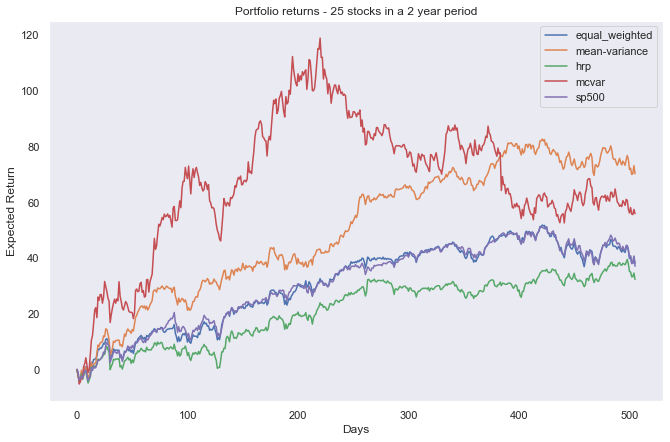

In [596]:
rd = get_returns_dict(sp500_pr, equal_weighted_returns, mean_variance_returns, hrp_returns, mcvar_returns)
plot_returns(rd, 25)

## Evaluación con todos los portafolios

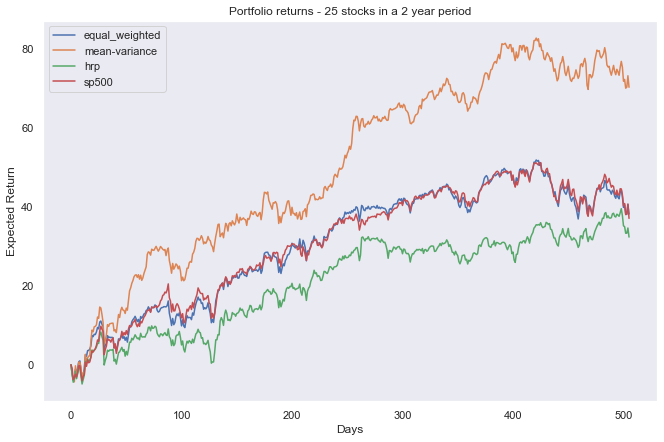

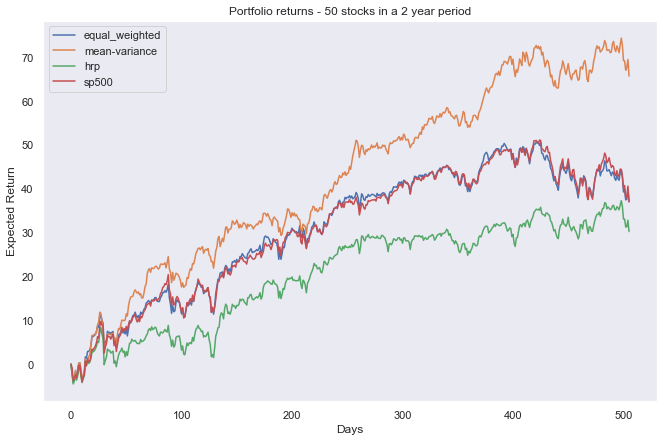

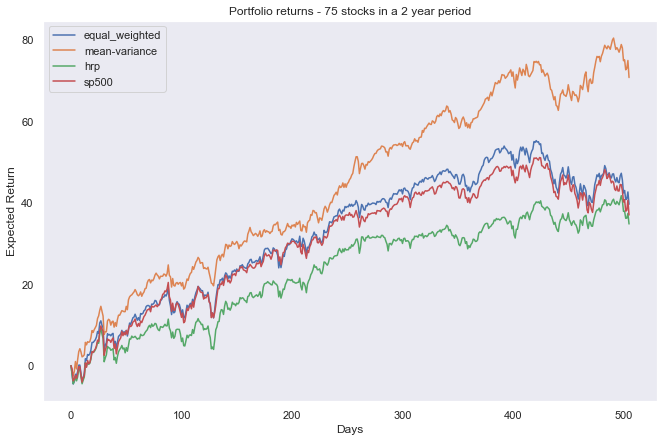

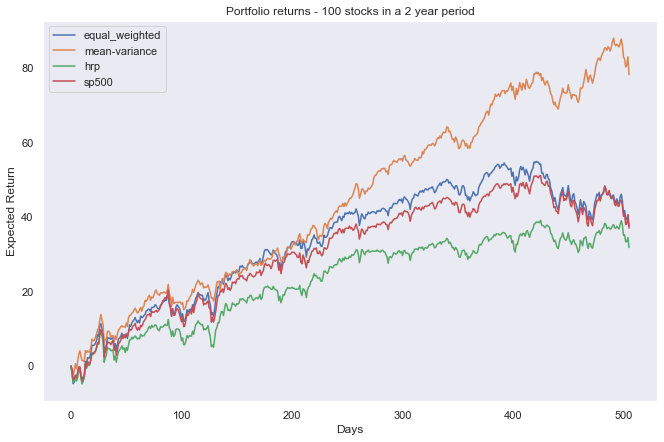

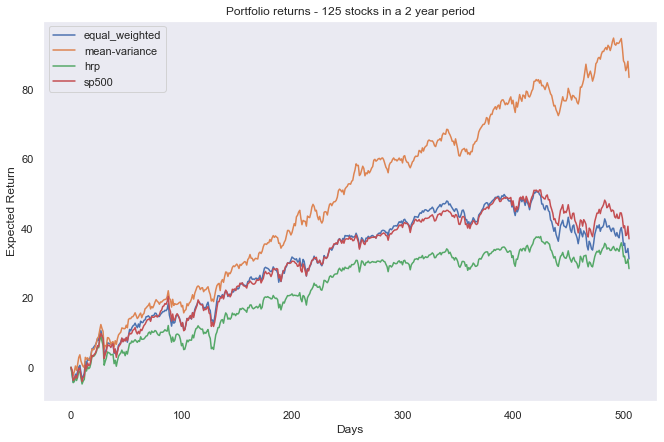

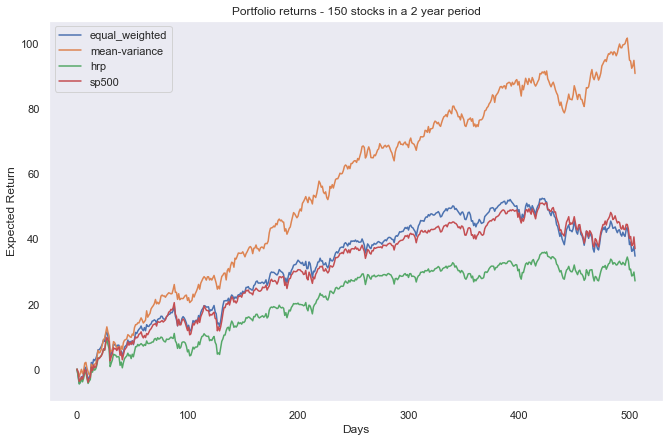

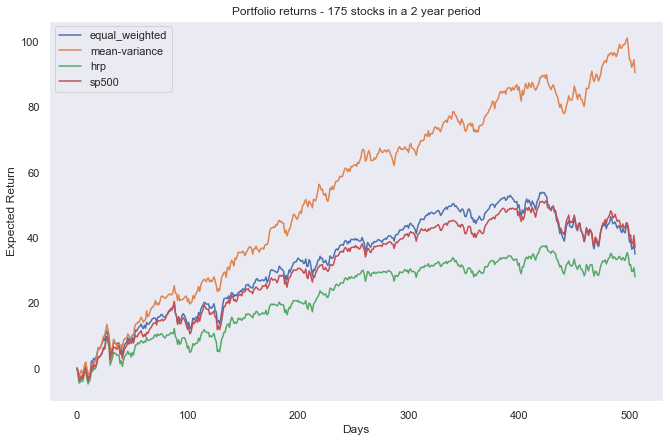

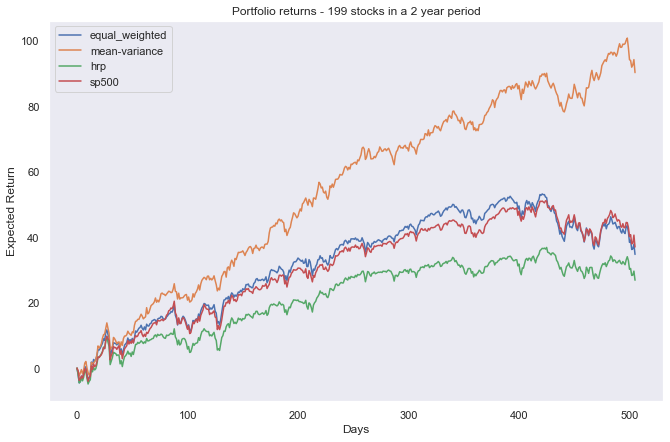

In [641]:
start_i = datetime.datetime(2020,4,29)
end_i = datetime.datetime(2022,4,29)

sp500 = get_stock_data('^GSPC', start_i, end_i)['Close']
benchmark = get_percent_returns(sp500, sp500=True)

portfolio_value = 250000 #250k USD

for p in portfolios:
    n = p.shape[1]
    
    # Equal Weighted portfolio
    equal_weights = dict(zip(list(p.columns), [1]*len(p.columns)))
    equal_weighted_returns = get_percent_returns(p, equal_weights)
    
    # Mean-variance portfolio 
    mean_variance_weights = get_mmv_returns(p, portfolio_value, False)
    mean_variance_returns = get_percent_returns(p, mean_variance_weights)
    
    # HRP portfolio 
    hrp_weights = get_hrp_weights(p, portfolio_value, False)
    hrp_returns = get_percent_returns(p, hrp_weights)
    
    # mcVar portfolio
    #mcvar_weights = get_mcvar_weights(p, portfolio_value, False)
    #mcvar_returns = get_percent_returns(p, mcvar_weights)
    
    # Plot
    d = {
        'equal_weighted':equal_weighted_returns,
        'mean-variance': mean_variance_returns,
        'hrp':hrp_returns,
        'sp500':benchmark
    }
    plot_returns(d, n)